#Kütüphane ekleme

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler


#Veri Seti Oluşturma

In [31]:
np.random.seed(42)


data_size = 1000
temperature = np.random.uniform(50, 150, data_size)  # Sıcaklık
pressure = np.random.uniform(10, 100, data_size)  # Basınç
vibration = np.random.uniform(0, 10, data_size)  # Titreşim
speed = np.random.uniform(0, 100, data_size)  # Hız

# Hata durumu oluşturma
fault = np.where((temperature > 120) & (pressure < 30) & (vibration > 5) & (speed < 20), 1, 0)


data = pd.DataFrame({
    'Temperature': temperature,
    'Pressure': pressure,
    'Vibration': vibration,
    'Speed': speed,
    'Fault': fault
})


print(data.head())


   Temperature   Pressure  Vibration      Speed  Fault
0    87.454012  26.661964   2.617057  67.270299      0
1   145.071431  58.771085   2.469788  79.668140      0
2   123.199394  88.565125   9.062546  25.046790      0
3   109.865848  75.900240   2.495462  62.487410      0
4    65.601864  82.590503   2.719497  57.174598      0


#Veri Setinin Genel Bilgileri

In [32]:

print(data.info())
print(data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  1000 non-null   float64
 1   Pressure     1000 non-null   float64
 2   Vibration    1000 non-null   float64
 3   Speed        1000 non-null   float64
 4   Fault        1000 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 39.2 KB
None
       Temperature     Pressure    Vibration        Speed        Fault
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000
mean     99.025655    55.631557     5.024057    49.037505     0.005000
std      29.213736    26.297090     2.906742    28.648934     0.070569
min      50.463202    10.289644     0.000116     0.065339     0.000000
25%      73.597327    31.696684     2.613510    24.190077     0.000000
50%      99.680738    56.686052     5.006139    48.427928     0.000000
75%     124.431959    78.441855     7.591035    

# Hata Durumu Dağılım Grafiği

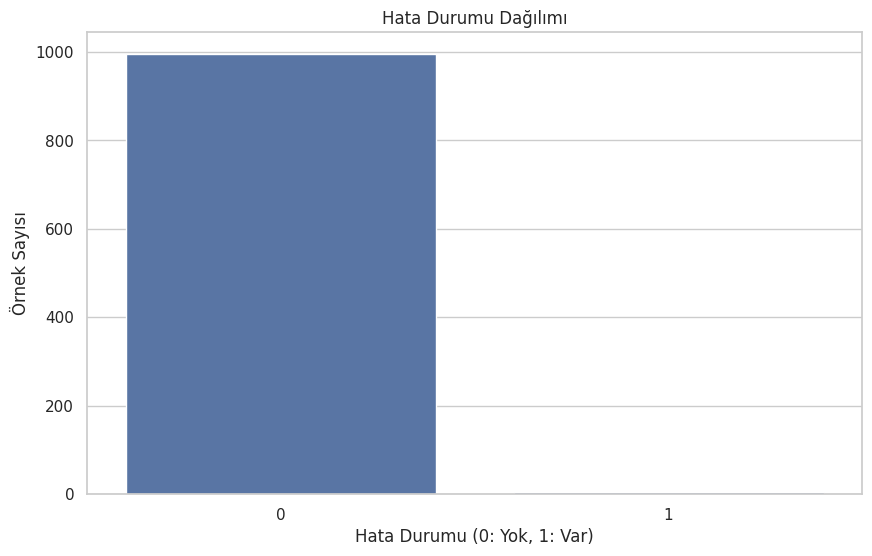

In [33]:
# Hata durumu dağılımını görselleştirme
plt.figure(figsize=(10, 6))
sns.countplot(x='Fault', data=data)
plt.title('Hata Durumu Dağılımı')
plt.xlabel('Hata Durumu (0: Yok, 1: Var)')
plt.ylabel('Örnek Sayısı')
plt.show()


#Özelliklerin Dağılımı

<Figure size 1500x1000 with 0 Axes>

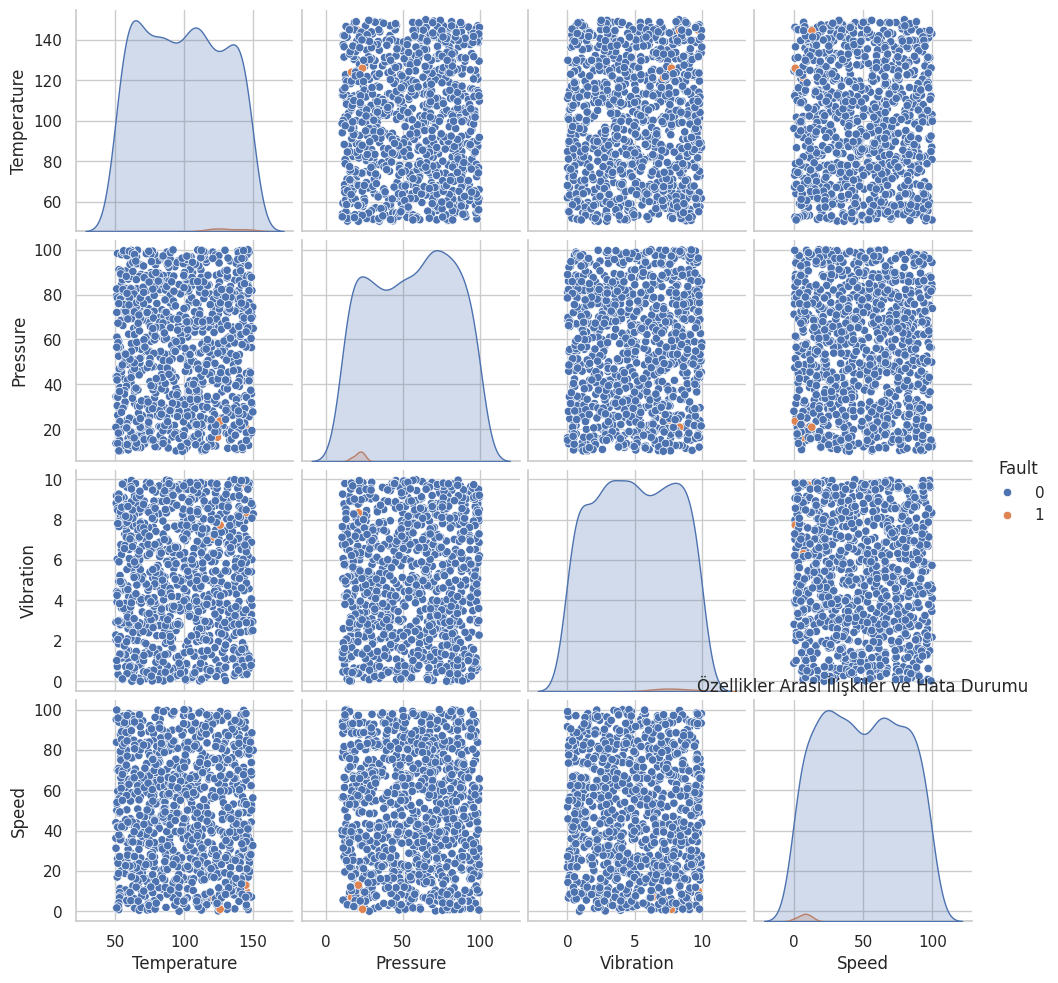

In [34]:
# Özelliklerin dağılımını görselleştirme
plt.figure(figsize=(15, 10))
sns.pairplot(data, hue='Fault')
plt.title('Özellikler Arası İlişkiler ve Hata Durumu')
plt.show()


#Kolerasyon Matrisi

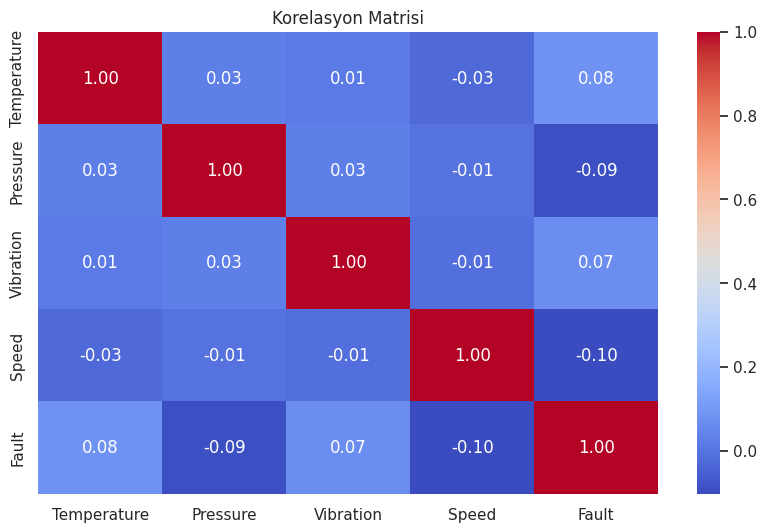

In [35]:
# Korelasyon matrisini hesaplama ve görselleştirme
plt.figure(figsize=(10, 6))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Korelasyon Matrisi')
plt.show()


#Model Eğitimi

In [36]:
# Özellikler ve etiketleri ayırma
X = data.drop(columns=['Fault'])  # Özellikler
y = data['Fault']  # Etiket

# Veriyi eğitim ve test setine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Veriyi ölçeklendirme
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Random Forest sınıflandırıcı modeli oluşturma
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# tahimin kısmı
y_pred = model.predict(X_test)


#Model Değerlendirmesi

In [37]:
# Model değerlendirmesi
print(classification_report(y_test, y_pred))  # Sınıflandırma raporu
print(confusion_matrix(y_test, y_pred))        # Karmaşıklık matrisi


              precision    recall  f1-score   support

           0       0.99      1.00      0.99       198
           1       0.00      0.00      0.00         2

    accuracy                           0.99       200
   macro avg       0.49      0.50      0.50       200
weighted avg       0.98      0.99      0.99       200

[[198   0]
 [  2   0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#karmaşıklık Matrisi Görselleştirme

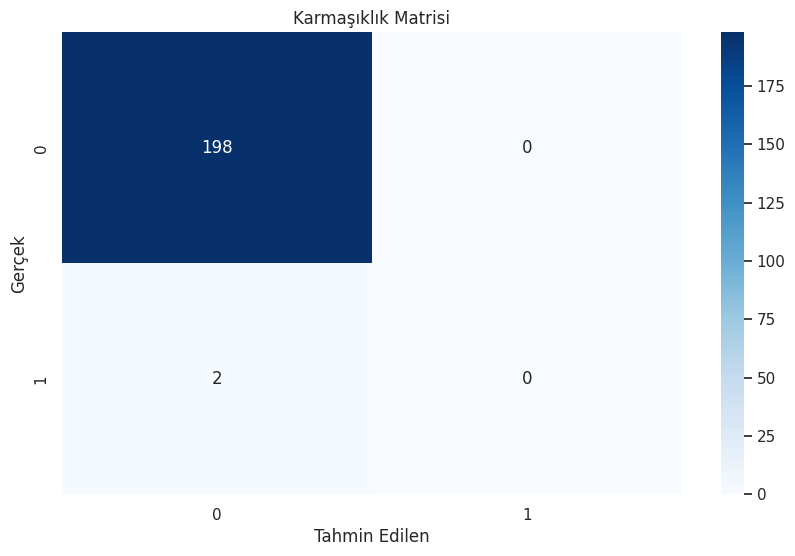

In [38]:
# Sonuçları görselleştirme
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')  # Karmaşıklık matrisinin ısı haritası
plt.title('Karmaşıklık Matrisi')
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek')
plt.show()
